BV

# Activity 1
Hint: use the file nutrition_demographic_covid_continent_2.csv

1. check if there are highly correlated features and drop them if there are any.
2. One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 4. ( Hint: check Dropfirst option).
3. for the first iteration, we will focus on the numericals data (numericals data frame) as our data source.
    1. X-y split (y is the target variable which is the total claim amount)
    2. (optional) remove the outliers from the numerical columns.

We have the Total Complain amount
Why we need a model to predict the Total Complain amount? = we need the historic data to predict the total claim amount for the news customers but with new characteristiques.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from IPython.display import Image
from IPython.display import HTML
from IPython.display import Markdown, display
def printmd(string):display(Markdown(string))
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [2]:
def load_original_data():
    filename = r"C:\Users\Barbara\OneDrive\Documents\GitHub\IH_Berliners\Data\5. Updated with continent codes\nutrition_demographic_covid_continent_2-fatality rate.csv"
    file1 = pd.read_csv(filename, index_col=False)
    #hk_df = pd.read_csv(filename, index_col=False)
    return file1

## Pipeline Controller

In [3]:
hk_df =load_original_data()

## Reading the dataframe

In [4]:
hk_df = load_original_data()

### check if there are highly correlated features and drop them if there are any

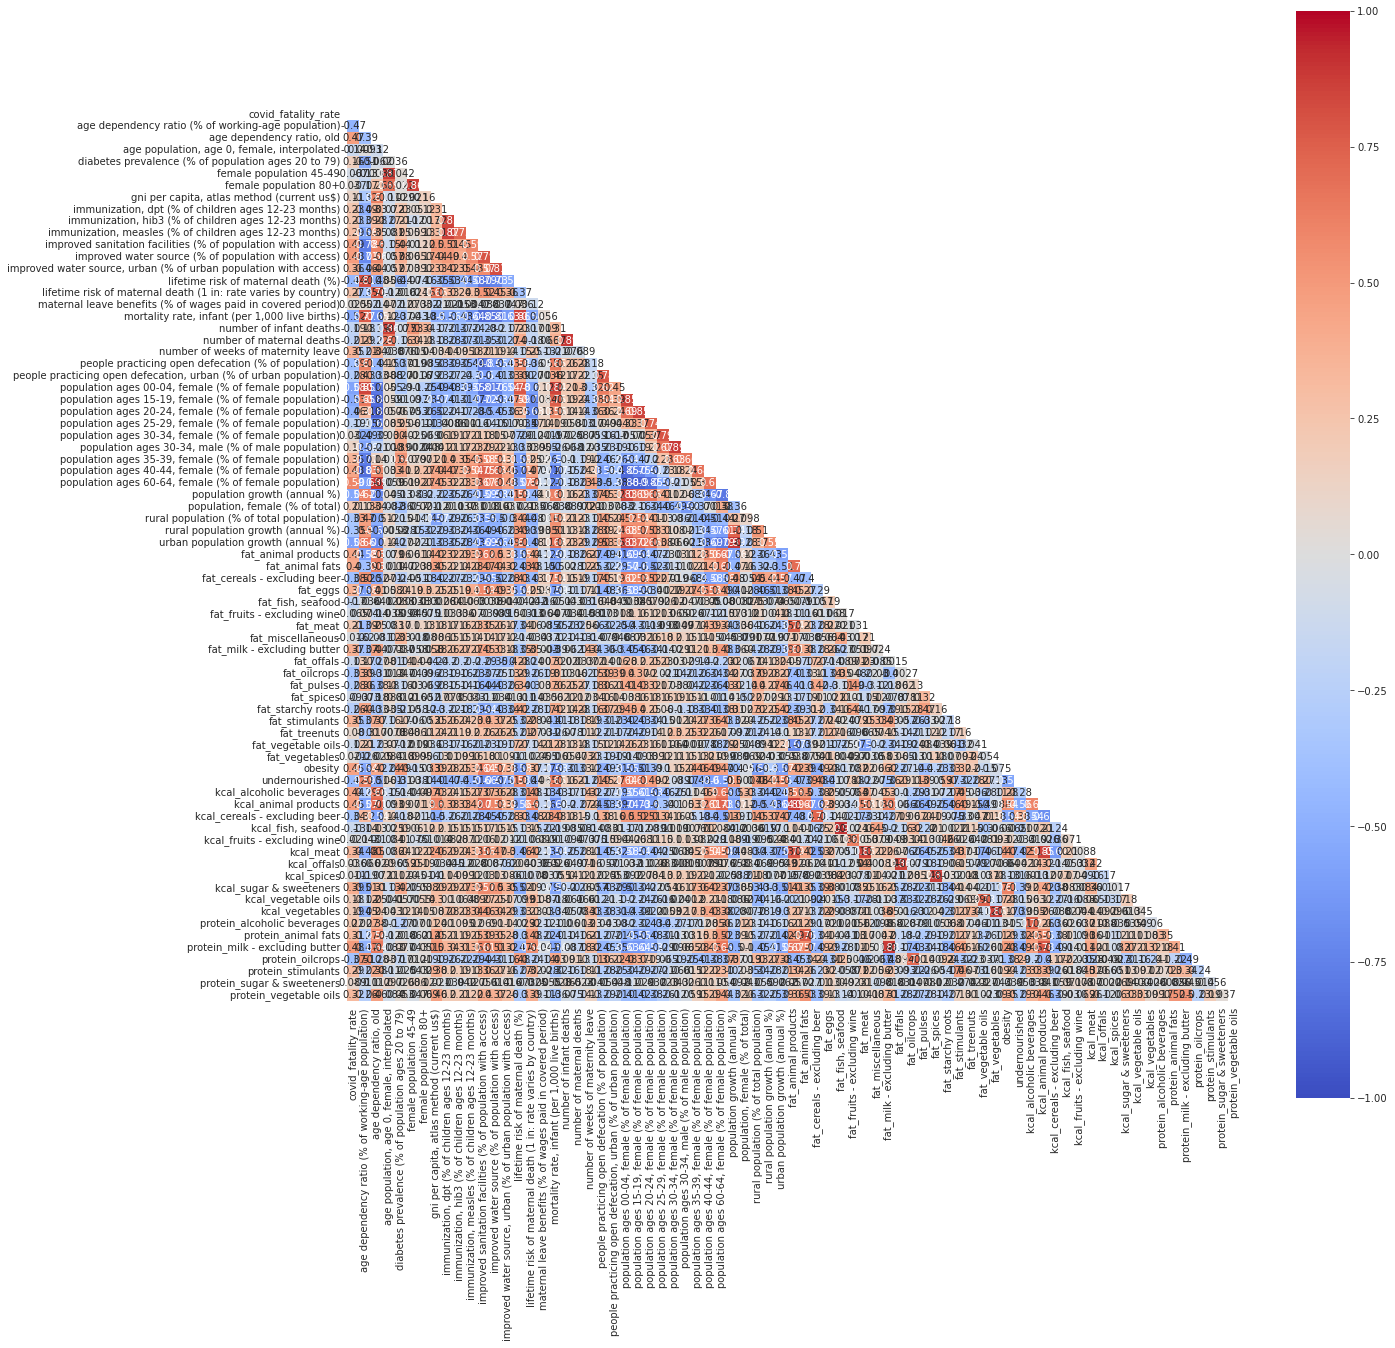

In [5]:
corr = hk_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

### One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 4. ( Hint: check Dropfirst option).

In [6]:
df_cat= hk_df.select_dtypes("object")

cat_val=pd.get_dummies(df_cat, drop_first=True)
cat_val

,continent_asia,continent_europe,continent_north america,continent_oceania,continent_south america,country_albania,country_algeria,country_angola,country_antigua and barbuda,country_argentina,...,country_uruguay,country_uzbekistan,country_vanuatu,country_venezuela,country_vietnam,country_yemen,country_zambia,country_zimbabwe,gni_category_low_gni,gni_category_mid_gni
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
160,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Select numerical data

Get the numeric data into dataframe called `numerical` 
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)

array([[<AxesSubplot:title={'center':'covid_fatality_rate'}>,
        <AxesSubplot:title={'center':'age dependency ratio (% of working-age population)'}>,
        <AxesSubplot:title={'center':'age dependency ratio, old'}>,
        <AxesSubplot:title={'center':'age population, age 0, female, interpolated'}>,
        <AxesSubplot:title={'center':'diabetes prevalence (% of population ages 20 to 79)'}>,
        <AxesSubplot:title={'center':'female population 45-49'}>,
        <AxesSubplot:title={'center':'female population 80+'}>,
        <AxesSubplot:title={'center':'gni per capita, atlas method (current us$)'}>,
        <AxesSubplot:title={'center':'immunization, dpt (% of children ages 12-23 months)'}>],
       [<AxesSubplot:title={'center':'immunization, hib3 (% of children ages 12-23 months)'}>,
        <AxesSubplot:title={'center':'immunization, measles (% of children ages 12-23 months)'}>,
        <AxesSubplot:title={'center':'improved sanitation facilities (% of population with acc

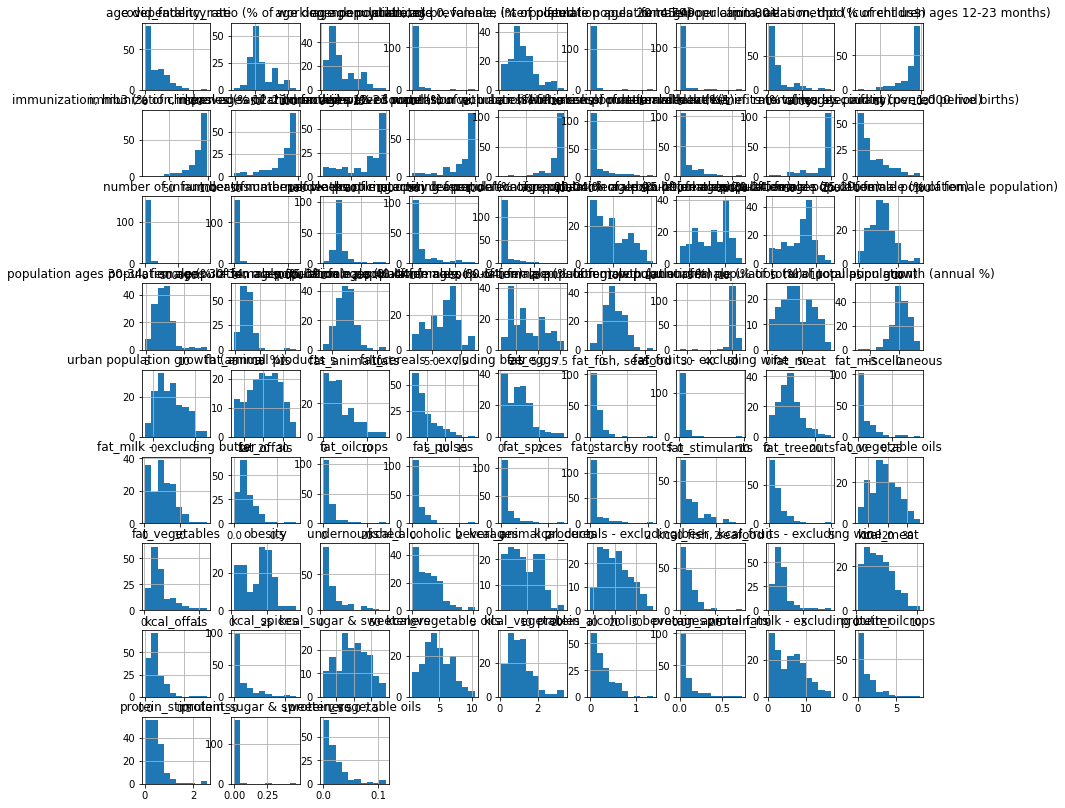

In [7]:
hk_df.hist(figsize=(14,14))

In [8]:
df_num = hk_df._get_numeric_data()
#df_num1 = df_num.drop(['number_of_open_complaints', 'number_of_policies' ], axis=1)
#df_num1


In [9]:
colnames_numerics_only = df_num.select_dtypes(include=np.number).columns.tolist()
colnames_numerics_only

['covid_fatality_rate',
 'age dependency ratio (% of working-age population)',
 'age dependency ratio, old',
 'age population, age 0, female, interpolated',
 'diabetes prevalence (% of population ages 20 to 79)',
 'female population 45-49',
 'female population 80+',
 'gni per capita, atlas method (current us$)',
 'immunization, dpt (% of children ages 12-23 months)',
 'immunization, hib3 (% of children ages 12-23 months)',
 'immunization, measles (% of children ages 12-23 months)',
 'improved sanitation facilities (% of population with access)',
 'improved water source (% of population with access)',
 'improved water source, urban (% of urban population with access)',
 'lifetime risk of maternal death (%)',
 'lifetime risk of maternal death (1 in: rate varies by country)',
 'maternal leave benefits (% of wages paid in covered period)',
 'mortality rate, infant (per 1,000 live births)',
 'number of infant deaths',
 'number of maternal deaths',
 'number of weeks of maternity leave',
 'pe

### Predictive Modeling

#### X-y split (y is the target variable which is the total claim amount)

In [10]:
X=df_num.drop(['covid_fatality_rate'], axis=1)
y=df_num.covid_fatality_rate

In [11]:
#X=X._get_numeric_data()
X

,age dependency ratio (% of working-age population),"age dependency ratio, old","age population, age 0, female, interpolated",diabetes prevalence (% of population ages 20 to 79),female population 45-49,female population 80+,"gni per capita, atlas method (current us$)","immunization, dpt (% of children ages 12-23 months)","immunization, hib3 (% of children ages 12-23 months)","immunization, measles (% of children ages 12-23 months)",...,kcal_sugar & sweeteners,kcal_vegetable oils,kcal_vegetables,protein_alcoholic beverages,protein_animal fats,protein_milk - excluding butter,protein_oilcrops,protein_stimulants,protein_sugar & sweeteners,protein_vegetable oils
0,86.954464,4.616073,470554.0,8.8,496113.0,43481.0,630.0000,78.000000,78.000000,68.000000,...,2.2261,2.3012,0.7504,0.0000,0.0277,5.5278,0.2034,0.5546,0.0000,0.0000
1,44.806973,17.950766,21438.0,10.3,97198.0,41381.0,4290.0000,98.000000,98.000000,98.000000,...,3.4422,2.8244,2.7508,0.1840,0.0711,16.4750,0.3722,0.2635,0.0042,0.0084
2,52.617579,9.062490,459353.0,7.5,1053861.0,253907.0,4870.0000,95.000000,95.000000,95.000000,...,3.9869,5.7638,2.0457,0.0323,0.0054,8.0616,0.1830,0.4628,0.0000,0.0269
3,99.855751,4.623604,502641.0,4.1,383280.0,38663.0,4180.0000,64.000000,64.000000,55.000000,...,2.7539,4.2741,0.3525,0.6285,0.0277,1.1460,2.1534,0.1017,0.0092,0.0092
4,45.650381,10.434645,734.0,13.6,4400.0,947.0,13390.0000,99.000000,99.000000,98.000000,...,5.8218,4.6904,1.2960,0.1535,0.1289,7.4349,0.7674,0.4113,0.0000,0.0430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,75.595147,4.893864,392662.0,5.1,409910.0,43605.0,13410.2027,69.000000,69.000000,67.000000,...,7.0303,3.9515,0.3636,0.0000,0.0188,1.9630,0.2254,0.3193,0.0000,0.0000
158,95.402326,5.683539,295178.0,4.1,216644.0,38313.0,1500.0000,90.000000,90.000000,90.000000,...,2.5590,3.0062,0.4472,0.4824,0.0338,1.0324,8.0562,0.0762,0.0000,0.0000
159,80.391033,5.347744,262428.0,3.9,194583.0,48432.0,850.0000,87.000000,87.000000,86.000000,...,5.0403,6.2601,0.2532,0.2929,0.0391,2.4114,1.5230,0.2636,0.0000,0.0293
160,47.920177,15.042344,1990.0,19.6,9292.0,3091.0,13410.2027,88.708075,87.474684,87.869565,...,4.2720,6.4716,0.9998,0.3262,0.1873,7.2857,1.2143,0.4591,0.0000,0.0362


<b>Data Splitting

In [12]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)
X_train, X_test, y_train, y_test

(     age dependency ratio (% of working-age population)  \
 146                                          49.721231    
 136                                          78.035123    
 120                                          48.886131    
 5                                            56.545360    
 16                                           81.982192    
 ..                                                 ...    
 17                                           63.694718    
 98                                           34.573829    
 66                                           52.448872    
 126                                          84.206248    
 109                                          87.708426    
 
      age dependency ratio, old  age population, age 0, female, interpolated  \
 146                  11.287031                                     678171.0   
 136                   5.925089                                     611175.0   
 120                  25.778138       

### (optional) remove the outliers from the numerical columns.

In [13]:
#df_num

In [14]:
df_num.describe()

,covid_fatality_rate,age dependency ratio (% of working-age population),"age dependency ratio, old","age population, age 0, female, interpolated",diabetes prevalence (% of population ages 20 to 79),female population 45-49,female population 80+,"gni per capita, atlas method (current us$)","immunization, dpt (% of children ages 12-23 months)","immunization, hib3 (% of children ages 12-23 months)",...,kcal_sugar & sweeteners,kcal_vegetable oils,kcal_vegetables,protein_alcoholic beverages,protein_animal fats,protein_milk - excluding butter,protein_oilcrops,protein_stimulants,protein_sugar & sweeteners,protein_vegetable oils
count,162.000000,162.000000,162.000000,1.620000e+02,162.000000,1.620000e+02,1.620000e+02,162.000000,162.000000,162.000000,...,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,106.965602,58.924620,13.318274,3.934265e+05,7.954938,1.367248e+06,4.688710e+05,13446.623707,88.644544,87.403540,...,4.831927,4.822975,1.083104,0.252810,0.103213,5.887772,1.358835,0.447350,0.009396,0.020598
std,112.743571,17.208556,8.877955,1.166946e+06,4.349271,5.574041e+06,1.415087e+06,17435.631435,12.649283,13.759637,...,2.153208,2.099033,0.646270,0.231754,0.136038,3.944343,1.467518,0.394016,0.043177,0.023458
min,0.000000,17.751439,1.339867,7.340000e+02,0.800000,2.229000e+03,3.420000e+02,320.000000,23.000000,20.000000,...,0.678600,0.932500,0.095700,0.000000,0.000000,0.264400,0.009700,0.014200,0.000000,0.000000
25%,11.881985,47.664177,6.079032,2.491025e+04,5.100000,8.275375e+04,1.476600e+04,2232.500000,86.250000,84.250000,...,3.422175,3.132775,0.602600,0.066075,0.022425,2.270250,0.387525,0.202575,0.000000,0.005225
50%,66.976262,53.226776,10.185822,9.336200e+04,7.200000,2.422860e+05,7.405400e+04,6615.000000,93.000000,92.500000,...,4.678350,4.638450,1.010250,0.191950,0.056250,5.602350,0.783500,0.352900,0.000000,0.015250
75%,182.323484,67.266557,20.027332,3.425280e+05,9.975000,8.109660e+05,2.633322e+05,13410.202700,97.000000,97.000000,...,6.345800,6.259500,1.334775,0.375400,0.122350,8.501675,1.785375,0.601250,0.004900,0.028225
max,645.989520,112.972801,43.323904,1.152096e+07,22.300000,6.065278e+07,1.280629e+07,93820.000000,99.000000,99.000000,...,9.549200,10.383900,3.352400,1.366000,0.734600,16.475000,8.064900,2.582400,0.469900,0.113500


To know which numerical variables we have to select to remove the outliers, we can visualize with boxplot the data and the outliers.

Identifying Outliers with Interquartile Range (IQR)
The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1. The lines of code below calculate and print the interquartile range for each of the variables in the dataset.

In [15]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

covid_fatality_rate                                                    170.441499
age dependency ratio (% of working-age population)                      19.602379
age dependency ratio, old                                               13.948300
age population, age 0, female, interpolated                         317617.750000
diabetes prevalence (% of population ages 20 to 79)                      4.875000
female population 45-49                                             728212.250000
female population 80+                                               248566.250000
gni per capita, atlas method (current us$)                           11177.702700
immunization, dpt (% of children ages 12-23 months)                     10.750000
immunization, hib3 (% of children ages 12-23 months)                    12.750000
immunization, measles (% of children ages 12-23 months)                 12.750000
improved sanitation facilities (% of population with access)            43.750000
improved water s

## Linear Regression

### Standarize the data

In [16]:
#fit is to find the right parameters for the z function (in this case mean and standard deviation)
std_scaler = StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )
#transform function compute the result for z function.
X_train_scaled=std_scaler.transform(X_train)

In [17]:
type(std_scaler)

sklearn.preprocessing._data.StandardScaler

In [18]:
type(X_train_scaled)

numpy.ndarray

In [19]:
X_train.shape

(113, 74)

In [20]:
X_test_scaled = std_scaler.transform(X_test)
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.49524601 -0.27393226  0.25165898 ...  0.19063747 -0.08667933
   1.78059129]
 [ 1.19818842 -0.87893979  0.19478985 ... -0.49774859 -0.19548536
  -0.90973441]
 [-0.54519277  1.36115253 -0.25595032 ... -0.09264397  0.11760956
  -0.18272443]
 ...
 [-0.33210768 -0.5814417   9.45549054 ... -0.67865965  0.82373853
  -0.90973441]
 [ 1.56727917 -0.90618544 -0.32140464 ... -1.03659122 -0.19548536
  -0.16328566]
 [ 1.77674206 -0.96785673  2.42315019 ... -1.06309566 -0.19548536
  -0.90973441]]
--------
[[-0.54749624  1.48264219 -0.28883706 ... -0.50869079  0.03767043
  -0.09719385]
 [-0.88231648 -0.02622291 -0.31625895 ... -0.61835596 -0.19548536
   0.69590795]
 [-0.72577505 -1.07639124 -0.0688601  ... -0.00948324 -0.19548536
  -0.68813244]
 ...
 [ 0.2878201  -0.84745042 -0.25484427 ...  3.61311492 -0.19548536
  -0.67646918]
 [-0.23156908 -0.66309312 -0.27503317 ... -0.90431216 -0.19548536
  -0.61426512]
 [ 0.2549586  -0.69963072 -0.22112821 ...  0.96291373  0.02656777
  -0.52095902]]


### Apply linear regression.

####  Modeling using Scikit Learn

Model fitting

In [21]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

#### Model parameters  ( b1,b2,b3,b4) and the intercept value b

In [22]:
print('The coefficients/parameters of the model are: ')
model.coef_

The coefficients/parameters of the model are: 


array([ 3.16308418e+02, -1.23626706e+02, -5.34437296e+01, -3.56146442e+01,
        1.04596199e+02, -1.43913370e+01, -9.26375029e+01, -3.92930890e+01,
        7.50612903e+01, -2.12364864e+01,  3.27651158e+00,  4.84087192e+01,
       -2.17487984e+01,  1.59776322e+00, -1.76985807e+01,  1.01245693e+01,
        5.21175282e+01, -6.26885454e+01,  3.82269039e+01,  1.71749074e+01,
       -1.27377844e+01,  7.57953354e+00, -4.00290218e+02,  5.74217676e+01,
       -8.15066596e+01,  8.70946865e+01,  7.77472637e+01, -2.59127768e+01,
       -5.20805318e+01,  3.72274859e+01,  6.88432924e+01,  8.49268991e+01,
       -9.95980644e+01,  4.55108304e+00,  1.11236752e+01, -6.68461103e+01,
        1.98699591e+04, -4.89921539e+03,  2.84236048e+03, -8.64958703e+02,
       -1.47723793e+03,  8.09259891e+02, -6.89404683e+03,  6.78133778e+01,
       -4.89237509e+03, -1.78108393e+02,  4.62331756e+03,  4.00129965e+02,
        4.42924028e+02,  3.82949348e+02,  6.56703333e+02,  7.45445416e+02,
        6.09364826e+03,  

In [23]:
print('The intercept value(b) of the model is: ')
model.intercept_

The intercept value(b) of the model is: 


112.84223599229425

#### Model Interpretation

#### Making prediction

In [24]:
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

In [25]:
y_pred

array([-129.04958724,  157.27616776,   11.40964108,   56.92096052,
         18.0678602 ,  220.65441168,  -17.94141377,  153.96338297,
         81.47236668,    7.37450078, -155.7499226 ,   28.88413996,
        123.86363656,  125.66923266,  308.06582299,  388.25353015,
        -43.07932678,  139.48819873,  -38.80827216,   29.91299179,
        332.76807266,  156.74034722, -268.68939743,  -51.04891798,
        129.58704724,  213.9772383 ,  265.78702088,   65.78308799,
       -285.27709037, 1490.88148528,   81.16733682,  -73.69070337,
        256.36337373,  -58.27778891,  205.45589956,  119.44444719,
         84.47008402,  143.2745633 ,  122.0388557 ,  205.49148253,
         17.19714985,  225.39730375,  -21.18091509,  103.01805736,
        -10.77740175,  191.97616866,  -52.26655134,  134.60053001,
        -18.3283293 ])

In [26]:
X

,age dependency ratio (% of working-age population),"age dependency ratio, old","age population, age 0, female, interpolated",diabetes prevalence (% of population ages 20 to 79),female population 45-49,female population 80+,"gni per capita, atlas method (current us$)","immunization, dpt (% of children ages 12-23 months)","immunization, hib3 (% of children ages 12-23 months)","immunization, measles (% of children ages 12-23 months)",...,kcal_sugar & sweeteners,kcal_vegetable oils,kcal_vegetables,protein_alcoholic beverages,protein_animal fats,protein_milk - excluding butter,protein_oilcrops,protein_stimulants,protein_sugar & sweeteners,protein_vegetable oils
0,86.954464,4.616073,470554.0,8.8,496113.0,43481.0,630.0000,78.000000,78.000000,68.000000,...,2.2261,2.3012,0.7504,0.0000,0.0277,5.5278,0.2034,0.5546,0.0000,0.0000
1,44.806973,17.950766,21438.0,10.3,97198.0,41381.0,4290.0000,98.000000,98.000000,98.000000,...,3.4422,2.8244,2.7508,0.1840,0.0711,16.4750,0.3722,0.2635,0.0042,0.0084
2,52.617579,9.062490,459353.0,7.5,1053861.0,253907.0,4870.0000,95.000000,95.000000,95.000000,...,3.9869,5.7638,2.0457,0.0323,0.0054,8.0616,0.1830,0.4628,0.0000,0.0269
3,99.855751,4.623604,502641.0,4.1,383280.0,38663.0,4180.0000,64.000000,64.000000,55.000000,...,2.7539,4.2741,0.3525,0.6285,0.0277,1.1460,2.1534,0.1017,0.0092,0.0092
4,45.650381,10.434645,734.0,13.6,4400.0,947.0,13390.0000,99.000000,99.000000,98.000000,...,5.8218,4.6904,1.2960,0.1535,0.1289,7.4349,0.7674,0.4113,0.0000,0.0430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,75.595147,4.893864,392662.0,5.1,409910.0,43605.0,13410.2027,69.000000,69.000000,67.000000,...,7.0303,3.9515,0.3636,0.0000,0.0188,1.9630,0.2254,0.3193,0.0000,0.0000
158,95.402326,5.683539,295178.0,4.1,216644.0,38313.0,1500.0000,90.000000,90.000000,90.000000,...,2.5590,3.0062,0.4472,0.4824,0.0338,1.0324,8.0562,0.0762,0.0000,0.0000
159,80.391033,5.347744,262428.0,3.9,194583.0,48432.0,850.0000,87.000000,87.000000,86.000000,...,5.0403,6.2601,0.2532,0.2929,0.0391,2.4114,1.5230,0.2636,0.0000,0.0293
160,47.920177,15.042344,1990.0,19.6,9292.0,3091.0,13410.2027,88.708075,87.474684,87.869565,...,4.2720,6.4716,0.9998,0.3262,0.1873,7.2857,1.2143,0.4591,0.0000,0.0362


### Predicting on new data

In [ ]:
## new record 
new_data=[2000,2500,100,25,12,1,1]
new_data_scaled=std_scaler.transform(np.array(new_data).reshape(-1,74))

In [ ]:
np.array(np.array(new_data).reshape(-1,7)).shape

In [ ]:
print('The total claim amount for the person who has a customer_life_time_value =2000, an income = 2500, a monthly premium auto = 100, months since last claim = 25 and months since policy inception = 12')
model.predict(new_data_scaled)

## Model Validation - Evaluating Model Performance

In [28]:
y_test

139    147.424103
144    210.942233
127     28.144880
65      11.184228
33       2.030000
90      13.732025
93       3.750000
72     225.982382
116    645.989520
117     51.146285
60       8.080000
147      8.440000
63     129.200278
130      1.910000
125      0.000000
36     296.799264
142      9.800000
74      14.484264
101     43.193936
28       2.060000
129    179.114646
8      195.271492
89       4.240000
53     375.101930
23      35.749569
137    218.978774
20     297.975158
114    189.048955
13      58.635551
31       0.354000
24      67.627022
103    147.753200
37      73.066901
143      3.400000
121    210.046979
41      64.667034
42      40.338547
7        9.470000
133    165.848086
4      129.604217
19     108.022816
79       0.000000
29       1.290000
153      4.740000
0       22.615363
91     103.811258
82       5.470000
107      3.570000
62       7.150000
Name: covid_fatality_rate, dtype: float64

In [29]:
y_pred

array([-129.04958724,  157.27616776,   11.40964108,   56.92096052,
         18.0678602 ,  220.65441168,  -17.94141377,  153.96338297,
         81.47236668,    7.37450078, -155.7499226 ,   28.88413996,
        123.86363656,  125.66923266,  308.06582299,  388.25353015,
        -43.07932678,  139.48819873,  -38.80827216,   29.91299179,
        332.76807266,  156.74034722, -268.68939743,  -51.04891798,
        129.58704724,  213.9772383 ,  265.78702088,   65.78308799,
       -285.27709037, 1490.88148528,   81.16733682,  -73.69070337,
        256.36337373,  -58.27778891,  205.45589956,  119.44444719,
         84.47008402,  143.2745633 ,  122.0388557 ,  205.49148253,
         17.19714985,  225.39730375,  -21.18091509,  103.01805736,
        -10.77740175,  191.97616866,  -52.26655134,  134.60053001,
        -18.3283293 ])

### Evaluating model with plots

#### Scatter plot y_pred vs y , histogram of the residuals and Residuals by Predicted

In [30]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

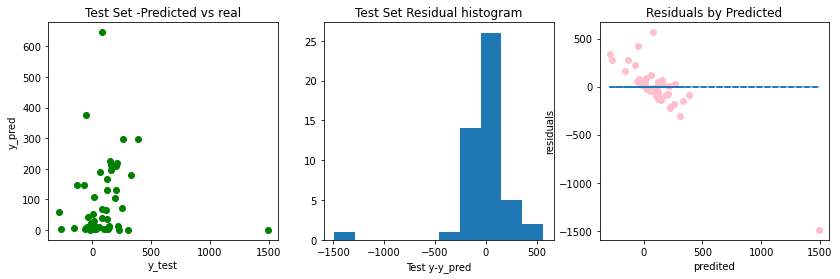

In [31]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test,'o',  color= 'green')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o", color = 'pink')
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

1. Linearility, We have a 45 degrees, good alineation between the y_test and y_pred 
2. The errors follow a normal distribution. I look the y_test-y_predict, im showing the error with the histogram and we can see a normal distribution (my errors follow a normal distribution: normality of residuals), with mean 0, and maybe standard deviation
3. The variance follows a constant/linear behaviour. The errors of my predictions are, the variace, how the data is disperse; We can see the variance is constant=equivalente (orange line)

<b> more fancy using seaborn

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

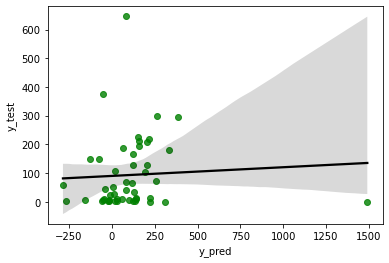

In [32]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "green"}, line_kws={"color": "black"})

### Error metrics

#### MSE (Mean Square Error) & MAE(Mean Absolute Error)

In [33]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

71131.40058697236
140.97821162397636


In [34]:
##prediction on the train set
mse(y_train,y_pred_train)

1401.4763431497865

#### R-Squared is also termed the standardized version of MSE

R-squared is always between 0 and 100%:

0% represents a model that does not explain any of the variation in the response variable around its mean. The mean of the dependent variable predicts the dependent variable as well as the regression model.
100% represents a model that explains all the variation in the response variable around its mean.
Usually, the larger the R2, the better the regression model fits your observations.

In [35]:
R2=r2_score(y_test,y_pred)
R2

-3.6156017118516637

In [36]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
R2_test

-3.6156017118516637

###  getting the number of parameters 

In [37]:
X_test.shape[1]

74

In [38]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

9.521110852649226

#### Feature Importance

In [39]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [40]:
features_importances

,Attribute,Importance
36,fat_animal products,19869.959142
42,fat_meat,6894.046828
52,fat_vegetable oils,6093.648264
37,fat_animal fats,4899.215388
44,fat_milk - excluding butter,4892.375087
46,fat_oilcrops,4623.317560
38,fat_cereals - excluding beer,2842.360484
40,"fat_fish, seafood",1477.237929
39,fat_eggs,864.958703
41,fat_fruits - excluding wine,809.259891


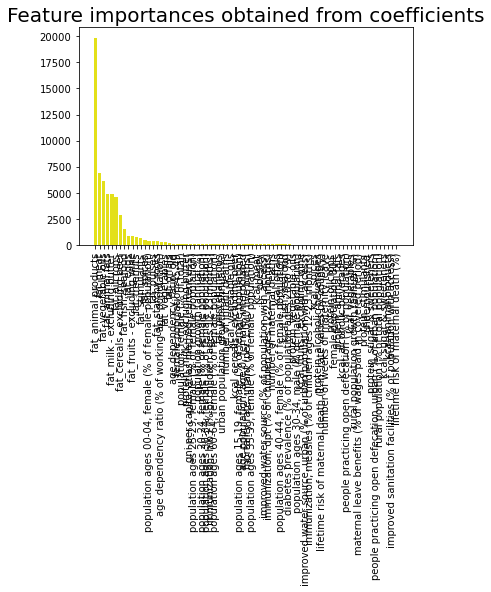

In [41]:
plt.bar(x=features_importances['Attribute'], height = features_importances['Importance'], color='#e3e019')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()